## **Energia odnawialna - eksploracja danych**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = "darkgrid")

In [2]:
df = pd.read_csv('data\energy_dataset_.csv')

### *1. Opis zbioru danych*

In [3]:
df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

Ramka danych dotyczy systemów energii odnawialnej. Zawiera 15000 wierszy i 13 kolumn, wśrod nich: 
* 0 - typ energii odnawialnej (np. słoneczna, wiatrowa), 
* 1 - moc zainstalowana w MW (megawatach), 
* 2 - roczna produkcja energii (w MWh (megawatogodzinach))
* 3 - roczne zużycie energii w (MWh), 
* 4 - pojemność energii (w MWh),
* 5 - efektywność przechowywania energii (%),
* 6 - poziom integracji sieci, 
* 7 - koszt inwestycji (w USD (dolarach amerykańskich)), 
* 8 - źródło finansowania, 
* 9 - bodźce finansowe (w USD),
* 10 - redukcja emisji gazów cieplarnianych (w tonach), 
* 11 - indeks redukcji zanieczyszczenia powietrza, 
* 12 - liczba stworzonych miejsc pracy

W ramce danych w kolumnach 0, 6 i 8 ("Type_of_Renewable_Energy", "Grid_Integration_Level" i "Funding_Sources") znajdują się tak naprawdę zmienne jakościowe, ukryte pod liczbami naturalnymi odpowiadającymi odpowiednim kategoriom. Zmienimy w ramce te wartości na nazwy odpowiednich kategorii.

In [5]:
df2 = df.copy()
df2["Type_of_Renewable_Energy"] = df["Type_of_Renewable_Energy"].map({1: "Solar", 2: "Wind", 3: "Hydroelectric", 4: "Geothermal", 5: "Biomass", 6: "Tidal", 7: "Wave"})
df2["Grid_Integration_Level"] = df["Grid_Integration_Level"].map({1: "Fully Integrated", 2: "Partially Integrated", 3: "Minimal Integration", 4: "Isolated Microgrid"})
df2["Funding_Sources"] = df["Funding_Sources"].map({1: "Government", 2: "Private", 3: "Public-Private Partnership"})
df2

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,Geothermal,93.423205,103853.2206,248708.4892,2953.248771,89.887562,Isolated Microgrid,4.732248e+08,Government,9.207772e+06,6663.816572,81.742461,1366
1,Geothermal,590.468942,190223.0649,166104.1642,5305.174042,84.403343,Isolated Microgrid,1.670697e+08,Private,1.685101e+06,30656.049820,78.139042,1743
2,Solar,625.951142,266023.4824,424114.6308,2620.192622,60.498249,Partially Integrated,8.463610e+07,Private,5.111813e+06,1749.613759,8.461296,363
3,Solar,779.998728,487039.5296,308337.7316,1925.250307,86.897861,Minimal Integration,3.967690e+08,Private,4.805902e+06,43233.237820,8.402441,2821
4,Hydroelectric,242.106837,482815.0856,360437.7705,3948.945383,70.949351,Partially Integrated,3.574413e+07,Government,1.668601e+07,14858.662760,28.822867,2583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Hydroelectric,745.032555,280007.5738,230544.8268,4351.687893,90.791405,Isolated Microgrid,3.484136e+08,Private,1.558508e+07,25234.911810,78.923200,1452
14996,Solar,15.187023,377340.5803,358547.3589,6792.194696,78.252040,Isolated Microgrid,2.560179e+08,Public-Private Partnership,6.866618e+06,15762.519790,54.982974,2598
14997,Hydroelectric,877.539059,480497.3920,214441.6719,4588.725297,58.282928,Fully Integrated,1.300112e+08,Private,3.837764e+06,44597.809410,43.915897,2713
14998,Wave,551.264716,436383.1694,137043.8713,7251.144215,73.573666,Partially Integrated,3.334831e+08,Private,5.347706e+06,34363.858000,4.877145,2128


### *2. Analiza zmiennych w zbiorze danych*

Poniżej znajdują się podstawowe statystyki dla zmiennych ilościowych występujących w zbiorze.

In [6]:
df2.describe()

,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Initial_Investment_USD,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,495.855747,252350.955621,225981.854966,5030.196472,75.219334,2.514849e+08,1.002977e+07,25234.722158,50.724179,2502.668600
std,288.212872,144062.915425,129223.677997,2894.096326,14.485289,1.432843e+08,5.787303e+06,14378.915277,28.556578,1451.212661
min,1.091767,1030.103692,584.048006,2.200208,50.003494,1.008107e+06,5.155842e+04,100.974460,1.009712,10.000000
25%,245.475737,128568.875900,115587.428225,2543.341380,62.694076,1.259709e+08,4.963454e+06,12754.476927,26.224426,1228.000000
50%,492.907555,253216.871250,225226.374350,5054.036248,75.279702,2.539910e+08,1.002414e+07,25424.477000,50.250207,2496.000000
75%,742.254682,377083.805575,338656.214700,7536.935405,87.754318,3.759130e+08,1.507417e+07,37750.426285,75.720133,3765.000000
max,999.982979,499991.200400,449922.667800,9999.145037,99.994955,4.999407e+08,1.999855e+07,49997.578530,99.980494,4999.000000


Poniżej obliczymy, ile energii produkuje każda z elektrowni powyżej poziomu energii, którą zużywa.

In [7]:
df2["Energy_supply_MWh"] = df2["Energy_Production_MWh"] - df2["Energy_Consumption_MWh"]
df2[["Type_of_Renewable_Energy", "Energy_supply_MWh"]]

,Type_of_Renewable_Energy,Energy_supply_MWh
0,Geothermal,-144855.2686
1,Geothermal,24118.9007
2,Solar,-158091.1484
3,Solar,178701.7980
4,Hydroelectric,122377.3151
...,...,...
14995,Hydroelectric,49462.7470
14996,Solar,18793.2214
14997,Hydroelectric,266055.7201
14998,Wave,299339.2981


Widzimy od razu dość zaskakującą rzecz, że niektóre elektrownie zużywają więcej energii, niż produkują ("Energy_supply_MWh" jest ujemne). Sprawdźmy ile ich jest.

In [8]:
df2[df2.Energy_supply_MWh < 0].shape

(6730, 14)

Aż 6730 elektrowni spośród 15000 występujących w zbiorze zużywa rocznie więcej energii, niż produkuje. Jest to dosyć dziwne. Myślę, że można podchodzić do tych wyników z przymrużeniem oka, może tu być coś nie tak.

Poniżej policzymy średnią ilość utworzonych miejsc pracy w zależności od rodzaju energii odnawialnej.

In [9]:
b = df2.groupby(["Type_of_Renewable_Energy"]).Jobs_Created.agg("mean").sort_values(ascending = False)
b = b.to_frame("Average amount of jobs created")
b

,Average amount of jobs created
Type_of_Renewable_Energy,
Tidal,2520.220339
Biomass,2512.946977
Wind,2511.432334
Hydroelectric,2510.081595
Solar,2490.255417
Geothermal,2488.813302
Wave,2484.237458


Wartości są zaskakująco zbliżone do siebie, niezależnie od rodzaju energii.

Kolejna tabelka przedstawia pojemność energii w megawatogodzinach w zależności od źródła finansowania elektrowni.

In [10]:
b = df2.groupby(["Funding_Sources"]).Energy_Storage_Capacity_MWh.agg("median").sort_values(ascending = False)
b = b.to_frame("Median_Energy_Storage_Capacity_MWh")
b

,Median_Energy_Storage_Capacity_MWh
Funding_Sources,
Public-Private Partnership,5152.720058
Government,5027.089653
Private,4991.535492


Dane w ramce są bardzo zbalansowane, niezależnie od sposobu grupowania czy kolumn, po których agregujemy (sprawdzałam to dla większej ilości przykładów, niż te uwzględnione w analizie). Z tego powodu w mojej analizie nie udało mi się znaleźć zbyt wielu odkrywczych rzeczy.

### *3. Wykresy*

Boxplot efektywności przechowywania w zależności od źrodła finansowania:

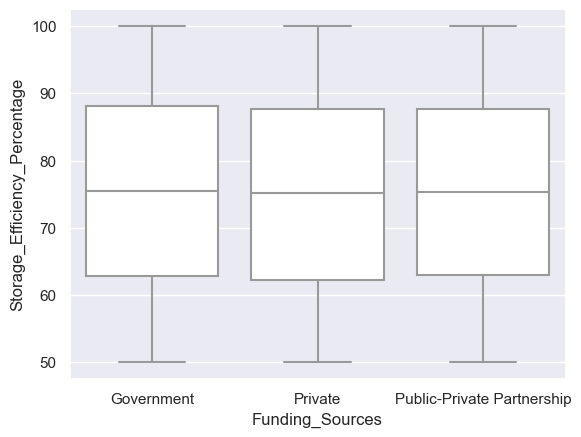

In [11]:
sns.boxplot(data=df2, x = "Funding_Sources", y = "Storage_Efficiency_Percentage", color='w')
plt.show()


Dane wydają się być wylosowane. Jest niemożliwym, że w jakimkolwiek miejscu efektywność przechowywania energii sięga 100%. Podejrzane też jest, że dla każdego źródła finansowania najmniejsza efektywność wynosi 50%, a mediany i kwartyle są dla każdej kategorii praktycznie takie same. Spróbuję dalej pokazać, że faktycznie dane nie są prawdziwe.

Poniższe histogramy znowu dotyczą efektywności przechowywania energii w zależności od źródła finansowania elektrowni.

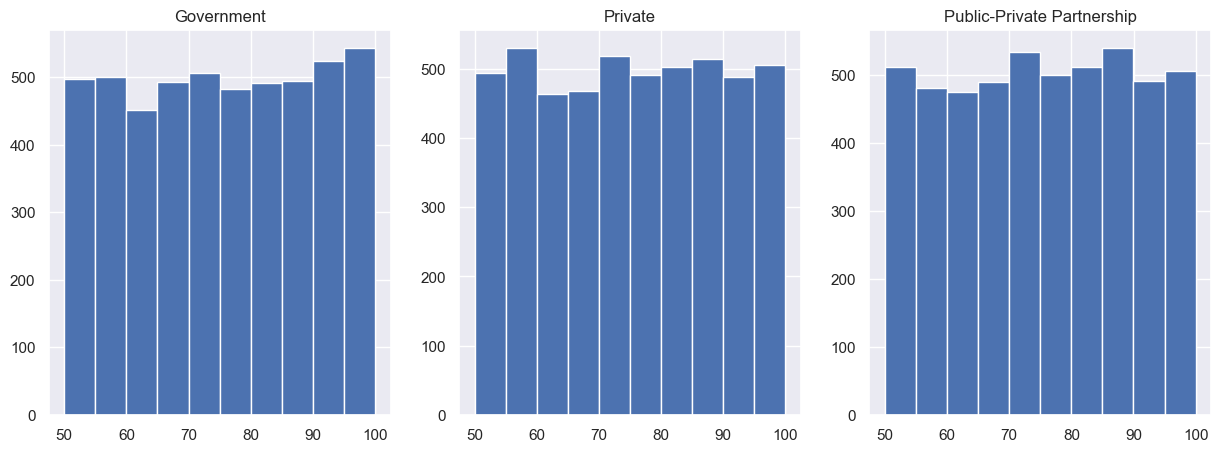

In [12]:

figure, axis = plt.subplots(1, 3, figsize = (15,5))

axis[0].hist(df2[df2["Funding_Sources"] == "Government"].Storage_Efficiency_Percentage, 10)
axis[0].set_title("Government") 
  
axis[1].hist(df2[df2["Funding_Sources"] == "Private"].Storage_Efficiency_Percentage, 10)
axis[1].set_title("Private") 

axis[2].hist(df2[df2["Funding_Sources"] == "Public-Private Partnership"].Storage_Efficiency_Percentage, 10)
axis[2].set_title("Public-Private Partnership") 

plt.show()

Widzimy, że zmienna efektywności przechowywania ma w przybliżeniu rozkład jednostajny na przedziale [50,100] dla każdej z kategorii źródła finansowania. Jest to bardzo nienaturalne i znowu sugeruje nam, że dane nie są prawdziwe.

Poniższa mapa przedstawia korelacje między zmiennymi ilościowymi. Zmienne występujące w ramce nie są ani trochę skorelowane ze sobą (poza zmienną stworzoną przeze mnie, będącą różnicą dwóch innych). Jest to znowu podejrzane (, ale uzasadnia, dlaczego trudno jest znaleźć ciekawe zależności w danych).

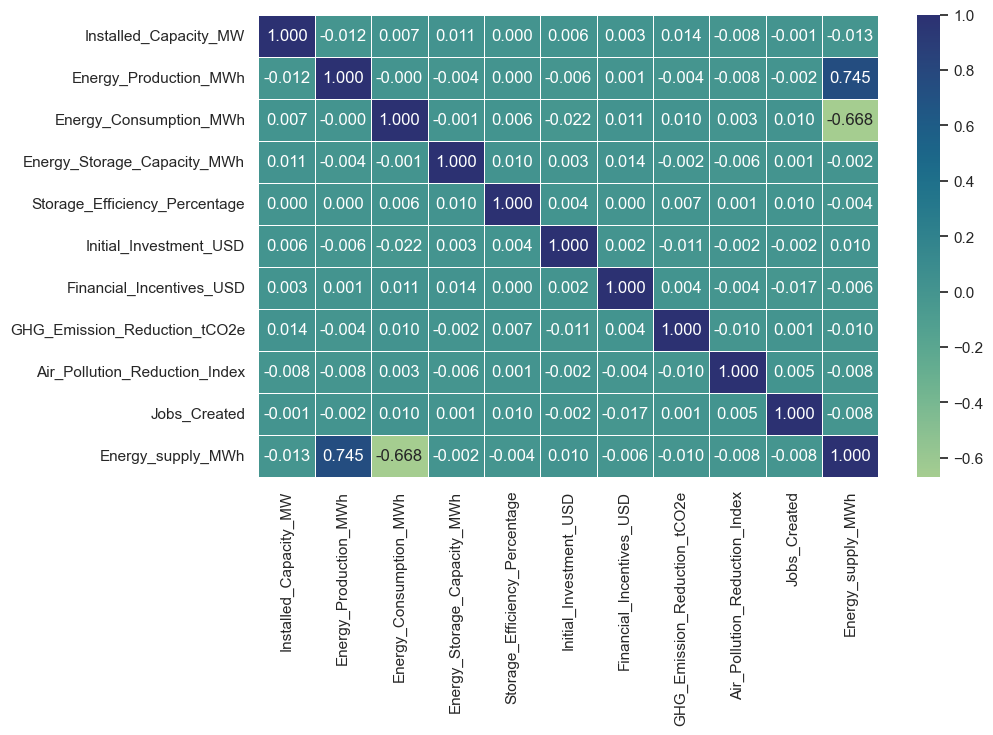

In [13]:
plt.figure(figsize = (10,6))
sns.heatmap(df2.corr(), annot = True, fmt = ".3f", linewidths = 0.5, cmap = "crest")
plt.show()

Kolejny wykres to scatterplot dla prywatnych elektrowni pokazujący zależność między produkcją a zużyciem energii z podziałem na typ energii odnawialnej. Trochę wygląda to tak, jakby dane zostały wygenerowane przez słabo wyszkoloną sztuczną inteligencję. Jest to skrajnie nieprawdopodobne, że między produkcją a zużyciem energii nie ma żadnej korelacji.

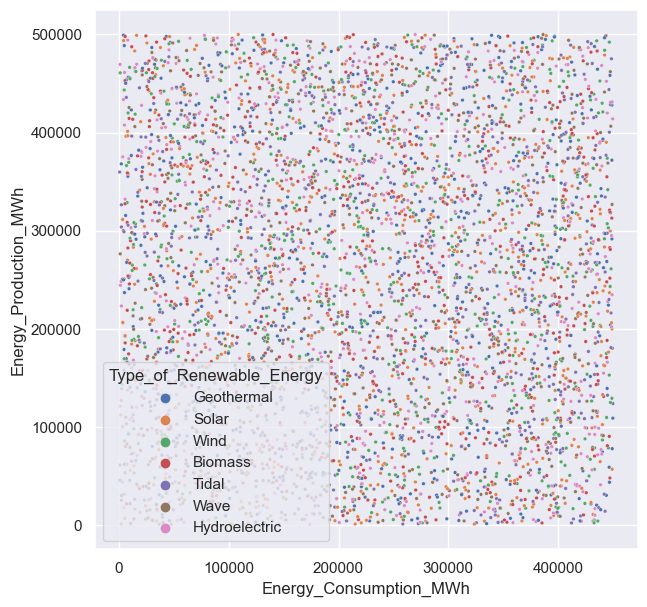

In [14]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = df2[df2["Funding_Sources"] == "Private"], x = "Energy_Consumption_MWh", y = "Energy_Production_MWh", hue = "Type_of_Renewable_Energy", s = 7)
plt.show()

Podsumowując, myślę, że dane, które analizowałam, nie są prawdziwe. Większość otrzymanych wyników po prostu nie ma sensu. Dlatego nie byłoby rozsądym wyciągać na ich podstawie jakiekolwiek wnioski.